In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile
import root_numpy as rn
import numpy as np

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.10.2 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
#MC BNB + Cosmics 
f ='/Volumes/UBooNEData/mcc8/MiniWorkshop_020617/cosmicsBNB/full.root' #ana_hist_02a2d31b-c51a-4150-9aa6-e5b703b3b64f.root'
a = rn.root2array(f,treename='analysistree/anatree',branches=['flsTime_simpleFlashBeam','flsPe_simpleFlashBeam'])

IOError: unable to access tree 'analysistree/anatree' in /Volumes/UBooNEData/mcc8/MiniWorkshop_020617/cosmicsBNB/full.root

In [ ]:
#MC BNB Only
f_full ='/Volumes/UBooNEData/mcc8/MiniWorkshop_020617/bnbonly/full.root' #ana_hist_02a2d31b-c51a-4150-9aa6-e5b703b3b64f.root'
a_full = rn.root2array(f_full,treename='analysistree/anatree',branches=['flsTime_simpleFlashBeam','flsPe_simpleFlashBeam'])

In [3]:
#MC Cosmics Only
f_cosO ='/Volumes/UBooNEData/mcc8/AnalysisRetreat_031317/MC_corsika_open/full.root' #ana_hist_02a2d31b-c51a-4150-9aa6-e5b703b3b64f.root'
a_cosO = rn.root2array(f_cosO,treename='analysistree/anatree',branches=['flsTime_simpleFlashBeam','flsPe_simpleFlashBeam'])

In [5]:
#MC BNB + Cosmics
f_v = [a['flsTime_simpleFlashBeam'][i][j] for i in xrange(a.shape[0]) \
       for j in xrange(len(a['flsTime_simpleFlashBeam'][i])) ]

f_pe_v = [a['flsPe_simpleFlashBeam'][i][j] for i in xrange(a.shape[0]) \
       for j in xrange(len(a['flsPe_simpleFlashBeam'][i])) ]

f_cut_v = [a['flsTime_simpleFlashBeam'][i][j] for i in xrange(a.shape[0]) \
       for j in xrange(len(a['flsTime_simpleFlashBeam'][i])) \
           if a['flsPe_simpleFlashBeam'][i][j] > 20 ]

n_ev = a['flsTime_simpleFlashBeam'].shape[0]

In [6]:
#MC BNB Only
f_full_v = [a_full['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_full.shape[0]) \
       for j in xrange(len(a_full['flsTime_simpleFlashBeam'][i])) ]

f_full_pe_v = [a_full['flsPe_simpleFlashBeam'][i][j] for i in xrange(a_full.shape[0]) \
       for j in xrange(len(a_full['flsPe_simpleFlashBeam'][i])) ]

f_full_cut_v = [a_full['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_full.shape[0]) \
       for j in xrange(len(a_full['flsTime_simpleFlashBeam'][i])) \
           if a_full['flsPe_simpleFlashBeam'][i][j] > 20 ]

n_full_ev = a_full['flsTime_simpleFlashBeam'].shape[0]

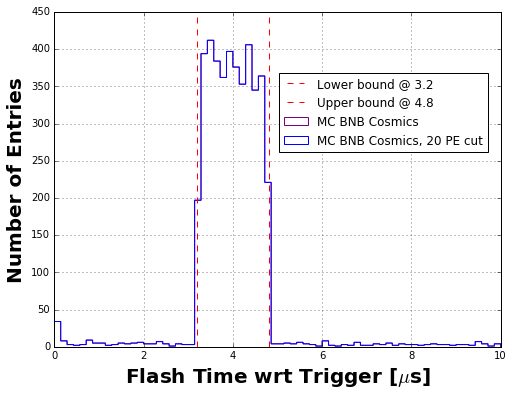

In [37]:
xmin = 3.2
xmax = 4.8

plt.figure(figsize=(8,6))
plt.hist(f_v,bins=70,label='MC BNB Cosmics',histtype='step',lw=1,color='purple',range=[0,10])#filled',alpha=0.4,color='b')
plt.hist(f_cut_v,bins=70,label='MC BNB Cosmics, 20 PE cut',histtype='step',lw=1,color='blue',range=[0,10])#filled',alpha=0.4,color='b')
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
#plt.yscale('log')
#plt.ylim(0,120)
plt.axvline(xmin,color='r',linestyle='--',label='Lower bound @ %.1f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',label='Upper bound @ %.1f' % xmax)
#plt.text(11, 150, '%.0f Events ' % n_ev, fontsize=20,verticalalignment='top')
plt.legend(loc='center left', bbox_to_anchor=(0.49,0.7))
#plt.show()
plt.savefig("FlashPlots/CosmicBNB.png")

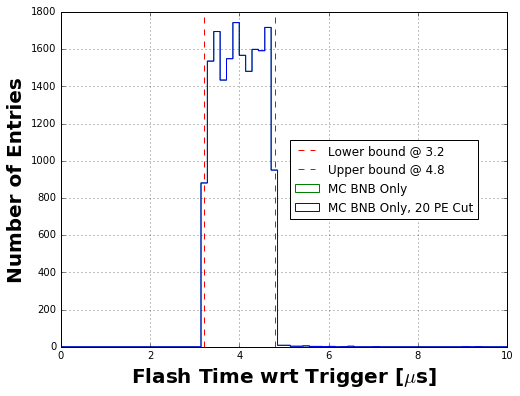

In [32]:
xmin = 3.2
xmax = 4.8

plt.figure(figsize=(8,6))
plt.hist(f_full_v,bins=70,label='MC BNB Only',histtype='step',lw=1,color='g',range=[0,10])#filled',alpha=0.4,color='b')
plt.hist(f_full_cut_v,bins=70,label='MC BNB Only, 20 PE Cut',histtype='step',lw=1,color='b',range=[0,10])#,range=[0,25])
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
#plt.yscale('log')
plt.axvline(xmin,color='r',linestyle='--',label='Lower bound @ %.1f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',label='Upper bound @ %.1f' % xmax)
#plt.text(11, 150, '%.0f Events ' % n_full_ev, fontsize=20,verticalalignment='top')
plt.legend(loc='center left', bbox_to_anchor=(0.5,0.5))
#plt.show()
plt.savefig("FlashPlots/BNBOnly.png")

In [9]:
f_cosO_pe_v = [a_cosO['flsPe_simpleFlashBeam'][i][j] for i in xrange(a_cosO.shape[0]) \
       for j in xrange(len(a_cosO['flsPe_simpleFlashBeam'][i])) ]

f_cosO_v = [a_cosO['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_cosO.shape[0]) \
       for j in xrange(len(a_cosO['flsTime_simpleFlashBeam'][i])) ]

n_cosO_ev = a_cosO['flsTime_simpleFlashBeam'].shape[0]

PEcut_v = [ x for x in xrange(0,2000,5)]

tot_cosO_flash = len(f_cosO_pe_v)
#tot_bnbO_flash = len(f_full_pe_v)

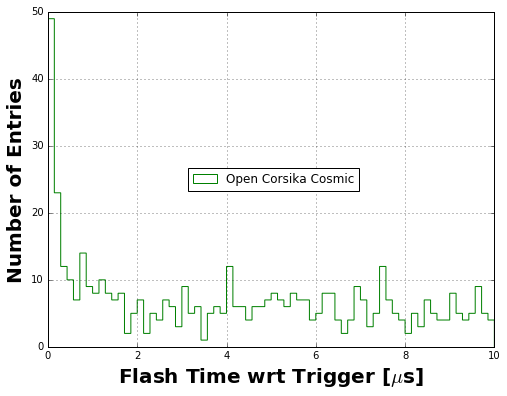

In [31]:
xmin = 3.2
xmax = 4.8

plt.figure(figsize=(8,6))
plt.hist(f_cosO_v,bins=70,label='Open Corsika Cosmic',histtype='step',lw=1,color='g',range=[0,10])#filled',alpha=0.4,color='b')
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
#plt.yscale('log')
#plt.axvline(xmin,color='r',linestyle='--',label='Lower bound @ %.1f' % xmin)
#plt.axvline(xmax,color='r',linestyle='--',label='Upper bound @ %.1f' % xmax)
#plt.text(11, 150, '%.0f Events ' % n_full_ev, fontsize=20,verticalalignment='top')
#plt.xlim(0,24)
plt.legend(loc='center left', bbox_to_anchor=(0.3,0.5))
plt.savefig("FlashPlots/OpenCosmic.png")

In [11]:
cosO_eff = []
cosO_pe_v = np.array(f_cosO_pe_v)

bnbO_eff = []
bnbO_pe_v = np.array(f_full_pe_v) 

for i in xrange(len(PEcut_v)):

    cut = PEcut_v[i] 
    nc_left = len(cosO_pe_v[cosO_pe_v > cut])
    cosO_eff.append(float(nc_left)/tot_cosO_flash)

    nb_left = len(bnbO_pe_v[bnbO_pe_v > cut])
    bnbO_eff.append(float(nb_left)/tot_bnbO_flash)
    

NameError: name 'tot_bnbO_flash' is not defined

ValueError: x and y must have same first dimension

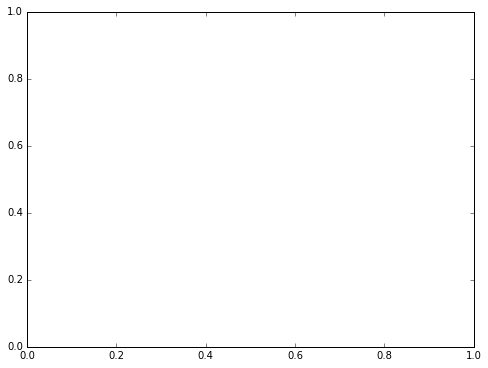

In [13]:
plt.figure(figsize=(8,6))
plt.plot(PEcut_v,cosO_eff,label='MCC8 Cosmics Only',color='b',marker='o')
plt.plot(PEcut_v,bnbO_eff,label='MCC8 BNB Only',color='r',marker='o')
plt.grid(True)
plt.xlabel('Flash Cut [PE]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
#plt.xlim(0,250)
#plt.ylim(0.65,1.00)
plt.legend()#loc='center left', bbox_to_anchor=(1,0.5))

In [4]:
#MC inTime Cosmics
f_in ='/Volumes/UBooNEData/mcc8/MiniWorkshop_020617/inTimeCosmicsMC/full.root' #ana_hist_02a2d31b-c51a-4150-9aa6-e5b703b3b64f.root'
a_in = rn.root2array(f_in,treename='analysistree/anatree',\
                     branches=['swtrigger_triggered','flsTime_simpleFlashBeam','flsPe_simpleFlashBeam'])

#Data EXT UNBIASED
f_extun ='/Volumes/UBooNEData/mcc8/AnalysisRetreat_031317/data_EXT_unbiased/full.root' #ana_hist_02a2d31b-c51a-4150-9aa6-e5b703b3b64f.root'
a_extun = rn.root2array(f_extun,treename='analysistree/anatree',\
                     branches=['flsTime_simpleFlashBeam','flsPe_simpleFlashBeam'])

f_ext ='/Volumes/UBooNEData/mcc8/AnalysisRetreat_031317/data_EXT/full.root' #ana_hist_02a2d31b-c51a-4150-9aa6-e5b703b3b64f.root'
a_ext = rn.root2array(f_ext,treename='analysistree/anatree',\
                     branches=['flsTime_simpleFlashBeam','flsPe_simpleFlashBeam'])


In [5]:
#MC BNB + Cosmics
f_in_cut_v = [a_in['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_in.shape[0]) \
       for j in xrange(len(a_in['flsTime_simpleFlashBeam'][i])) \
           if a_in['flsPe_simpleFlashBeam'][i][j] > 20 ]

f_in_v = [a_in['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_in.shape[0]) \
       for j in xrange(len(a_in['flsTime_simpleFlashBeam'][i])) ]

f_in_wgt_v = [a_in['flsPe_simpleFlashBeam'][i][j] for i in xrange(a_in.shape[0]) \
       for j in xrange(len(a_in['flsTime_simpleFlashBeam'][i])) ]

f_in_sw_v = [a_in['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_in.shape[0]) \
       for j in xrange(len(a_in['flsTime_simpleFlashBeam'][i])) if a_in['swtrigger_triggered'][i] == 0]

f_inin_sw_v = [a_in['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_in.shape[0]) \
       for j in xrange(len(a_in['flsTime_simpleFlashBeam'][i])) if a_in['swtrigger_triggered'][i] == 1 ]

f_inin_sw_wgt_v = [a_in['flsPe_simpleFlashBeam'][i][j] for i in xrange(a_in.shape[0]) \
       for j in xrange(len(a_in['flsTime_simpleFlashBeam'][i])) if a_in['swtrigger_triggered'][i] == 1 ]

#Ext UNBIASED
f_extun_v = [a_extun['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_extun.shape[0]) \
       for j in xrange(len(a_extun['flsTime_simpleFlashBeam'][i])) ]

f_extun_wgt_v = [ a_extun['flsPe_simpleFlashBeam'][i][j] for i in xrange(a_extun.shape[0]) \
       for j in xrange(len(a_extun['flsTime_simpleFlashBeam'][i])) ]

#EXT
f_ext_trig_v = [a_ext['flsTime_simpleFlashBeam'][i][j] for i in xrange(a_ext.shape[0]) \
       for j in xrange(len(a_ext['flsTime_simpleFlashBeam'][i])) ]

f_ext_trig_wgt_v = [a_ext['flsPe_simpleFlashBeam'][i][j] for i in xrange(a_ext.shape[0]) \
       for j in xrange(len(a_ext['flsTime_simpleFlashBeam'][i])) ]
     
print len(f_extun_v), len(f_in_v)

1070 3267


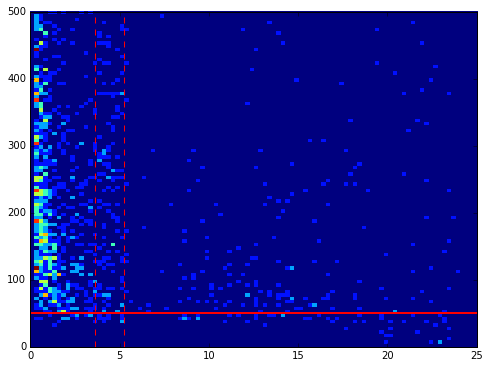

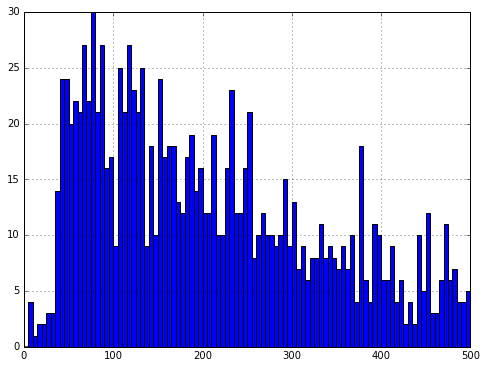

In [35]:
xmin = 3.65
xmax = 5.25 #.8

fig = plt.figure(figsize=(8,6))
_ = plt.hist2d(f_in_v,f_in_wgt_v,bins=100,range=[(0,25),(0,500)])
plt.axhline(50,color='r',lw=2)
plt.axvline(xmin,color='r',linestyle='--',lw=1,label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',lw=1,label='Upper bound @ %.2f' % xmax)

#nbins=1000
#H, xedges, yedges = np.histogram2d(f_in_wgt_v,f_in_v,bins=nbins)
#Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
#fig = plt.figure(figsize=(8,6))
#plt.pcolormesh(yedges,xedges,Hmasked)
#plt.ylim(0,1000)


fig = plt.figure(figsize=(8,6))
_ = plt.hist(f_in_wgt_v,bins=100,range=(0,500))
plt.grid(True)

In [15]:
float(len(f_inin_sw_v))/(len(f_in_sw_v)+len(f_inin_sw_v))

0.7300275482093664

(0, 10)

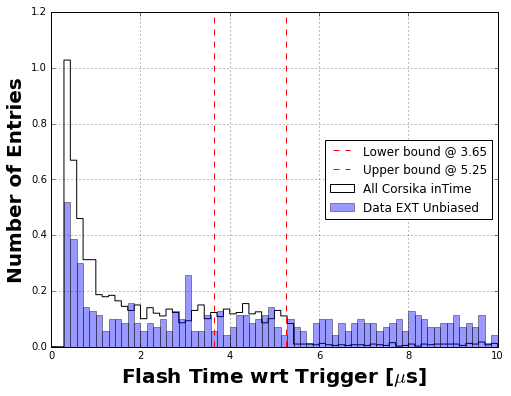

In [16]:
xmin = 3.65
xmax = 5.25 #.8

n=True

plt.figure(figsize=(8,6))
a,b,_ = plt.hist(f_in_v,bins=70,label='All Corsika inTime',normed=n,histtype='step',lw=1,color='black',linestyle='-',range=[0,10])
#plt.hist(f_in_sw_v,bins=70,label='Untriggered Corsika inTime',histtype='step',lw=1,color='black',linestyle='-.',range=[0,10])
#plt.hist(f_inin_sw_v,bins=70,label='Triggered Corsika inTime',histtype='step',lw=1,color='black',range=[0,10])#filled',alpha=0.4,color='b')
#plt.hist(f_extun_untrig_v,bins=70,label='Untriggered Data EXT Unbiased',histtype='step',lw=1,color='blue',linestyle=':',range=[0,10])#filled',alpha=0.4,color='b')
a2,b2,_= plt.hist(f_extun_v,bins=70,label='Data EXT Unbiased',normed=n,lw=1,color='blue',range=[0,10],alpha=0.4)
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
plt.axvline(xmin,color='r',linestyle='--',lw=1,label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',lw=1,label='Upper bound @ %.2f' % xmax)
plt.legend(loc='center left', bbox_to_anchor=(0.6,0.5))
plt.savefig("FlashPlots/InTime.png")
#plt.yscale('log')
plt.xlim(0,10)

In [17]:
print np.cumsum(a)[-1],  np.cumsum(a2)[-1]

7.0 7.0


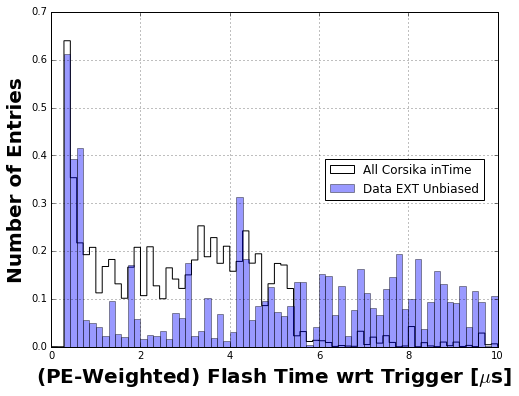

In [18]:
n=True

plt.figure(figsize=(8,6))
a,b,_=plt.hist(f_in_v,bins=70,weights=f_in_wgt_v,label='All Corsika inTime',normed=n,histtype='step',lw=1,color='black',linestyle='-',range=[0,10])
a1,b1,_ =plt.hist(f_extun_v,bins=70,weights=f_extun_wgt_v,label='Data EXT Unbiased',normed=n,lw=1,color='blue',range=[0,10],alpha=0.4)
plt.grid(True)
plt.xlabel('(PE-Weighted) Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(0.6,0.5))
#plt.yscale('log')

In [19]:
print np.cumsum(a)[-1]
print np.cumsum(a1)[-1]

7.0
7.0


(0, 10)

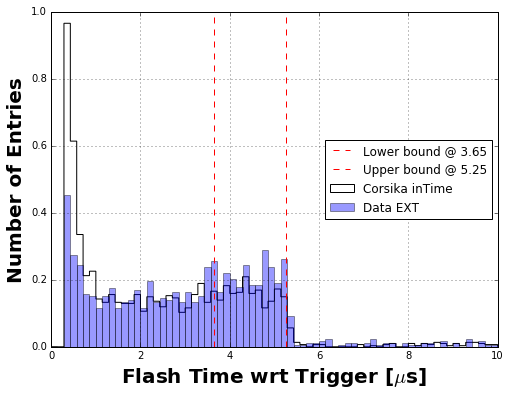

In [20]:
xmin = 3.65
xmax = 5.25 #4.8

n=True

plt.figure(figsize=(8,6))
plt.hist(f_inin_sw_v,bins=70,label='Corsika inTime',normed=n,histtype='step',lw=1,color='black',linestyle='-',range=[0,10])
plt.hist(f_ext_trig_v,bins=70,label='Data EXT',normed=n,lw=1,color='blue',range=[0,10],alpha=0.4)
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
plt.axvline(xmin,color='r',linestyle='--',lw=1,label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',lw=1,label='Upper bound @ %.2f' % xmax)
plt.legend(loc='center left', bbox_to_anchor=(0.6,0.5))
plt.savefig("FlashPlots/InTime_and_EXT.png")
#plt.yscale('log')
plt.xlim(0,10)

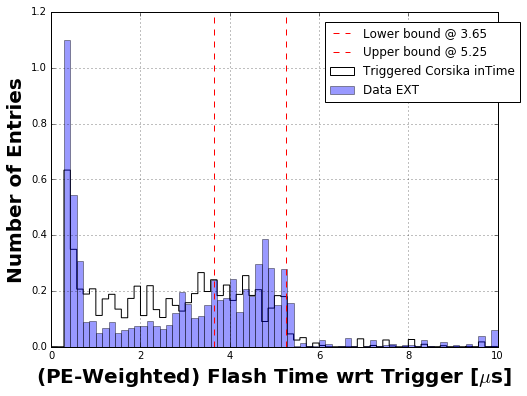

In [21]:
xmin = 3.65
xmax = 5.25 #4.8

n=True

plt.figure(figsize=(8,6))
c, b,_ = plt.hist(f_inin_sw_v,bins=70,weights=f_inin_sw_wgt_v,label='Triggered Corsika inTime',normed=n,\
         histtype='step',lw=1,color='black',linestyle='-',range=[0,10])
c2, b2,_ = plt.hist(f_ext_trig_v,bins=70,weights=f_ext_trig_wgt_v,label='Data EXT',normed=n,lw=1,color='blue',\
         range=[0,10],alpha=0.4)
plt.grid(True)
plt.xlabel('(PE-Weighted) Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
plt.axvline(xmin,color='r',linestyle='--',lw=1,label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',lw=1,label='Upper bound @ %.2f' % xmax)
plt.legend(loc='center left', bbox_to_anchor=(0.6,0.85))
#plt.yscale('log')

In [22]:
print np.cumsum(c)[-1], b
print np.cumsum(c2)[-1]

7.0 [  0.           0.14285714   0.28571429   0.42857143   0.57142857
   0.71428571   0.85714286   1.           1.14285714   1.28571429
   1.42857143   1.57142857   1.71428571   1.85714286   2.           2.14285714
   2.28571429   2.42857143   2.57142857   2.71428571   2.85714286   3.
   3.14285714   3.28571429   3.42857143   3.57142857   3.71428571
   3.85714286   4.           4.14285714   4.28571429   4.42857143
   4.57142857   4.71428571   4.85714286   5.           5.14285714
   5.28571429   5.42857143   5.57142857   5.71428571   5.85714286   6.
   6.14285714   6.28571429   6.42857143   6.57142857   6.71428571
   6.85714286   7.           7.14285714   7.28571429   7.42857143
   7.57142857   7.71428571   7.85714286   8.           8.14285714
   8.28571429   8.42857143   8.57142857   8.71428571   8.85714286   9.
   9.14285714   9.28571429   9.42857143   9.57142857   9.71428571
   9.85714286  10.        ]
7.0


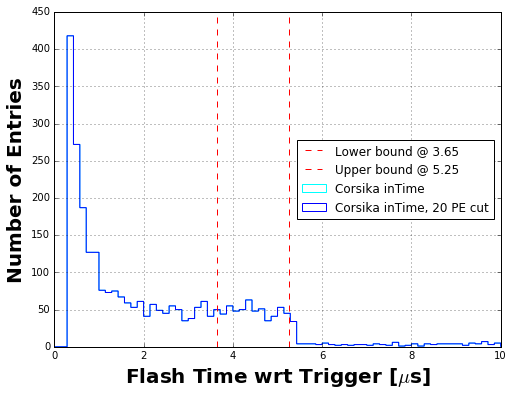

In [29]:
##### xmin = 3.65
#xmax = 5.25

plt.figure(figsize=(8,6))
plt.hist(f_in_v,bins=70,label='Corsika inTime',histtype='step',lw=1,color='cyan',range=[0,10])#filled',alpha=0.4,color='b')
#plt.hist(f_inin_sw_v,bins=70,label='Flash Time, Triggered Corsika inTime',histtype='step',lw=1,color='black',range=[0,10])#filled',alpha=0.4,color='b')
plt.hist(f_in_cut_v,bins=70,label='Corsika inTime, 20 PE cut',histtype='step',lw=1,color='blue',range=[0,10])#filled',alpha=0.4,color='b')
plt.grid(True)
plt.xlabel('Flash Time wrt Trigger [$\mu$s]',fontsize=20,weight='bold')
plt.ylabel('Number of Entries',fontsize=20,weight='bold')
plt.axvline(xmin,color='r',linestyle='--',label='Lower bound @ %.2f' % xmin)
plt.axvline(xmax,color='r',linestyle='--',label='Upper bound @ %.2f' % xmax)
plt.legend(loc='center left', bbox_to_anchor=(0.53,0.5))
plt.savefig("FlashPlots/InTime.png")
#plt.xlim(0,12)